In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import os

### Importing data

In [7]:
# Set current directory
curr_dir = os.getcwd()

# Load the dataset
f_path = os.path.join(curr_dir, "cancer patient data sets.csv")
data = pd.read_csv(f_path)
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


### Selecting informative features and the target variables

In [8]:
features = [
    'Age', 'Alcohol use', 'Smoking', 'chronic Lung Disease', 'Fatigue', 'Coughing of Blood', 'Chest Pain', 'Genetic Risk', 'OccuPational Hazards', 'Shortness of Breath', 'Weight Loss', 'Clubbing of Finger Nails', 'Dry Cough', 'Wheezing'
]
target = 'Level'

X = data[features]
y = data[target]

### Splitting the data into training and testing sets


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Random Forest Classifier
Random Forest Classifier is an ensemble learning technique that builds numerous decision trees during training and uses the most common class prediction among the trees for classification tasks. By aggregating predictions from multiple trees, it improves accuracy and resilience in making predictions.

*RF Algorithm:*

- Bootstrap Sampling: Random Forest builds multiple decision trees by sampling, with replacement, from the training dataset (bootstrap sampling).
- Feature Randomization: At each node of the tree, a random subset of features is considered for splitting, adding diversity to the trees.
- Voting Mechanism: For classification, the mode (most frequent class) among the trees is the final predicted class.
- Ensemble Learning: Random Forest is an ensemble learning method that combines the predictions of multiple decision trees to improve predictive performance and robustness. 

*Parameters:*

- n_estimators: Number of trees in the forest. Higher values generally lead to better performance.
- criterion: The function to measure the quality of a split. 'gini' for Gini impurity or 'entropy' for information gain.
- max_depth: Maximum depth of the individual trees. Controls the complexity of each tree.
- min_samples_split: Minimum number of samples required to split an internal node.
- min_samples_leaf: Minimum number of samples required to be at a leaf node.
- class_weight: Weights associated with classes in the form {class_label: weight}. 

### Training Model


Hyperparameter tuning for a Random Forest Classifier using GridSearchCV from scikit-learn (sklearn). <br>
The **'fit'** method of GridSearchCV fits the RandomForestClassifier on the training data (**'X_train'** and **'y_train'**) while trying out different combinations of hyperparameters defined in the 'parameters' dictionary.
<br>
Retrieve Best Estimator: After fitting, the **'best_estimator_'** attribute of the clf object provides the best estimator found by the GridSearchCV after performing the grid search over the specified hyperparameter space. The best estimator would be a RandomForestClassifier instance with the hyperparameters that yield the highest performance based on cross-validation.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,10,50],
             'n_estimators':[1,10,100,500,1000]}

rdf = RandomForestClassifier(random_state=0)


clf = GridSearchCV(rdf, parameters)
clf.fit(X_train, y_train)
clf.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=1, random_state=0)

### Results of GridSearchCV
Transform the raw grid search results into a structured DataFrame, making it easier to analyze and compare the performance of different hyperparameter combinations.

In [11]:
results_df = pd.DataFrame(clf.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
10_1,"{'max_depth': 10, 'n_estimators': 1}",1,1.000000,0.000000
10_10,"{'max_depth': 10, 'n_estimators': 10}",1,1.000000,0.000000
10_100,"{'max_depth': 10, 'n_estimators': 100}",1,1.000000,0.000000
10_500,"{'max_depth': 10, 'n_estimators': 500}",1,1.000000,0.000000
10_1000,"{'max_depth': 10, 'n_estimators': 1000}",1,1.000000,0.000000
50_1,"{'max_depth': 50, 'n_estimators': 1}",1,1.000000,0.000000
50_10,"{'max_depth': 50, 'n_estimators': 10}",1,1.000000,0.000000
50_100,"{'max_depth': 50, 'n_estimators': 100}",1,1.000000,0.000000
50_500,"{'max_depth': 50, 'n_estimators': 500}",1,1.000000,0.000000


In [12]:
model_scores = results_df.filter(regex=r"split\d*_test_score")

Creates a DataFrame model_scores containing the test scores of the model obtained from each cross-validation fold. It filters the columns of results_df DataFrame based on column names matching the regular expression "split\d*_test_score", which correspond to the test scores of each fold.

### Random Forest Classifier


In [13]:
rf_model = RandomForestClassifier(max_depth=10, n_estimators=1, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1, random_state=0)

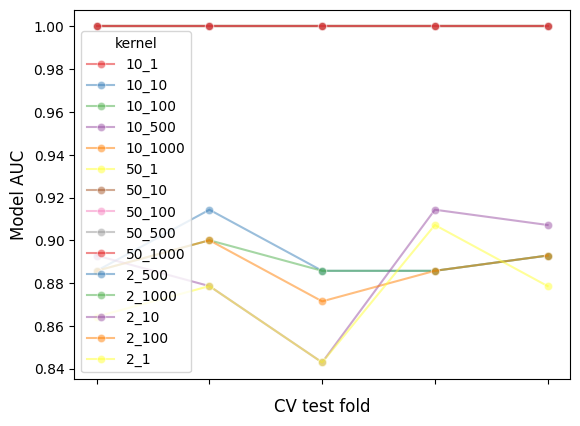

In [14]:
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

Generates a line plot to visualize the dependency between the cross-validation test fold and the Area Under the Curve (AUC) scores of the model, to assess the consistency of the model's performance across different cross-validation folds.<br>
It transposes the model_scores DataFrame and plots the AUC scores against the fold numbers.

### Visualizing Decision Trees


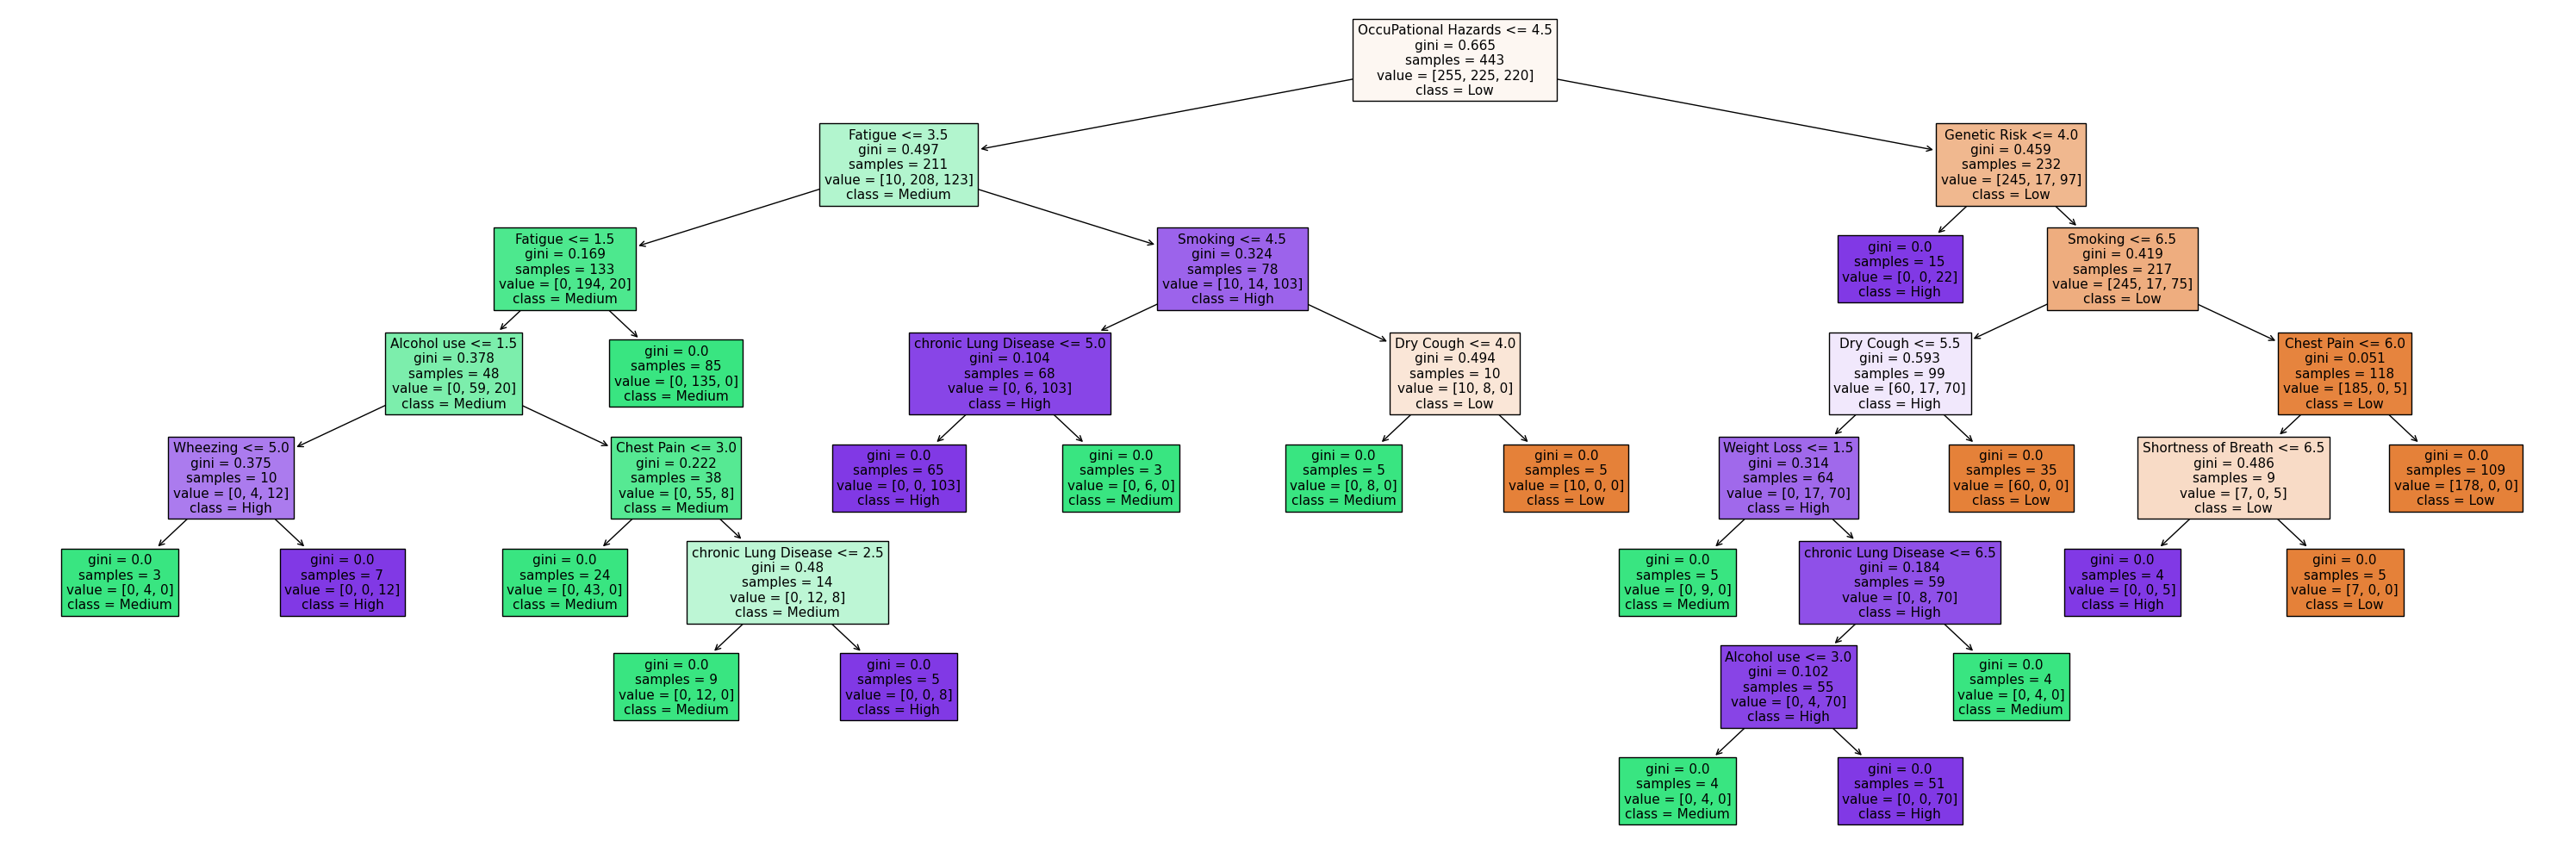

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree

max_trees = min(len(rf_model.estimators_), 10)  
cn = ['Low', 'Medium', 'High']

fig, ax = plt.subplots(max_trees, 1, figsize=(30,10*max_trees))

for i, forest in enumerate(rf_model.estimators_[:max_trees]):
    if max_trees > 1:
        tree.plot_tree(forest,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11,
                       ax=ax[i])
    else:
        tree.plot_tree(forest,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11)
    
plt.tight_layout(h_pad=-10)
plt.show()


A visual representation of decision trees within a Random Forest ensemble, offering insights into the individual trees' structures and decision-making processes. 

In [16]:
y_pred = rf_model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


Our model predicts "Low", "Medium" and "High" Levels of Lung Cancer in patients with an Accuracy of 1.0. <br>
Accuracy is the ratio of correctly predicted instances to the total number of instances in the dataset. It measures the overall correctness of the model's predictions across all classes.

### Classification Report and Confusion Matrix


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       119
         Low       1.00      1.00      1.00        84
      Medium       1.00      1.00      1.00        97

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Precision: TP / TP+FP <br>
Recall: TP / TP+FN <br>
F1-score: 2(Precision * Recall)/ Precision + Recall <br>
Support: Number of actual occurrences of each class in the dataset. 

In [19]:
# Displaying the importance of each feature
feature_importance = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)


                          importance
OccuPational Hazards        0.282171
Fatigue                     0.211447
Dry Cough                   0.147631
Smoking                     0.140221
chronic Lung Disease        0.059554
Genetic Risk                0.050361
Alcohol use                 0.037524
Weight Loss                 0.027913
Chest Pain                  0.017764
Wheezing                    0.012885
Shortness of Breath         0.012527
Age                         0.000000
Coughing of Blood           0.000000
Clubbing of Finger Nails    0.000000


In [20]:
from sklearn.metrics import confusion_matrix

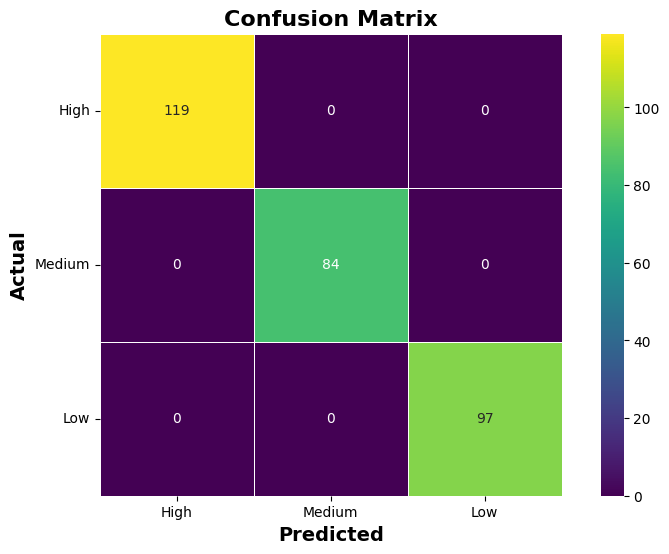

In [21]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))

sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
    xticklabels=["High", "Medium","Low"],
    yticklabels=["High", "Medium","Low"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()